In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [3]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all
Train Basin File Exists: True


In [18]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [20]:
lstmNoPhysics.train()

2024-12-18 10:00:21,323: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100021\output.log initialized.
2024-12-18 10:00:21,326: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100021
2024-12-18 10:00:21,329: ### Run configurations for testing_run
2024-12-18 10:00:21,331: experiment_name: testing_run
2024-12-18 10:00:21,333: train_basin_file: warm springs
2024-12-18 10:00:21,334: validation_basin_file: warm springs
2024-12-18 10:00:21,336: test_basin_file: warm springs
2024-12-18 10:00:21,338: train_start_date: 1994-10-01 00:00:00
2024-12-18 10:00:21,340: train_end_date: 2002-09-30 00:00:00
2024-12-18 10:00:21,344: validation_start_date: 2002-10-01 00:00:00
2024-12-18 10:00:21,346: validation_end_date: 2005-09-30 00:00:00
2024-12-18 10:00:21,348: test_start_date: 2005-10-01 00:00:00
2024-12-18 10:00:21,350: test_end_date: 2009-09-30 00:00:00
2024-12-18 10:00:21,354: device: cpu
2024

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
2024-12-18 10:04:07,257: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100021\test\model_epoch032\test_metrics.csv
2024-12-18 10:04:07,260: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100021\test\model_epoch032\test_results.p


Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

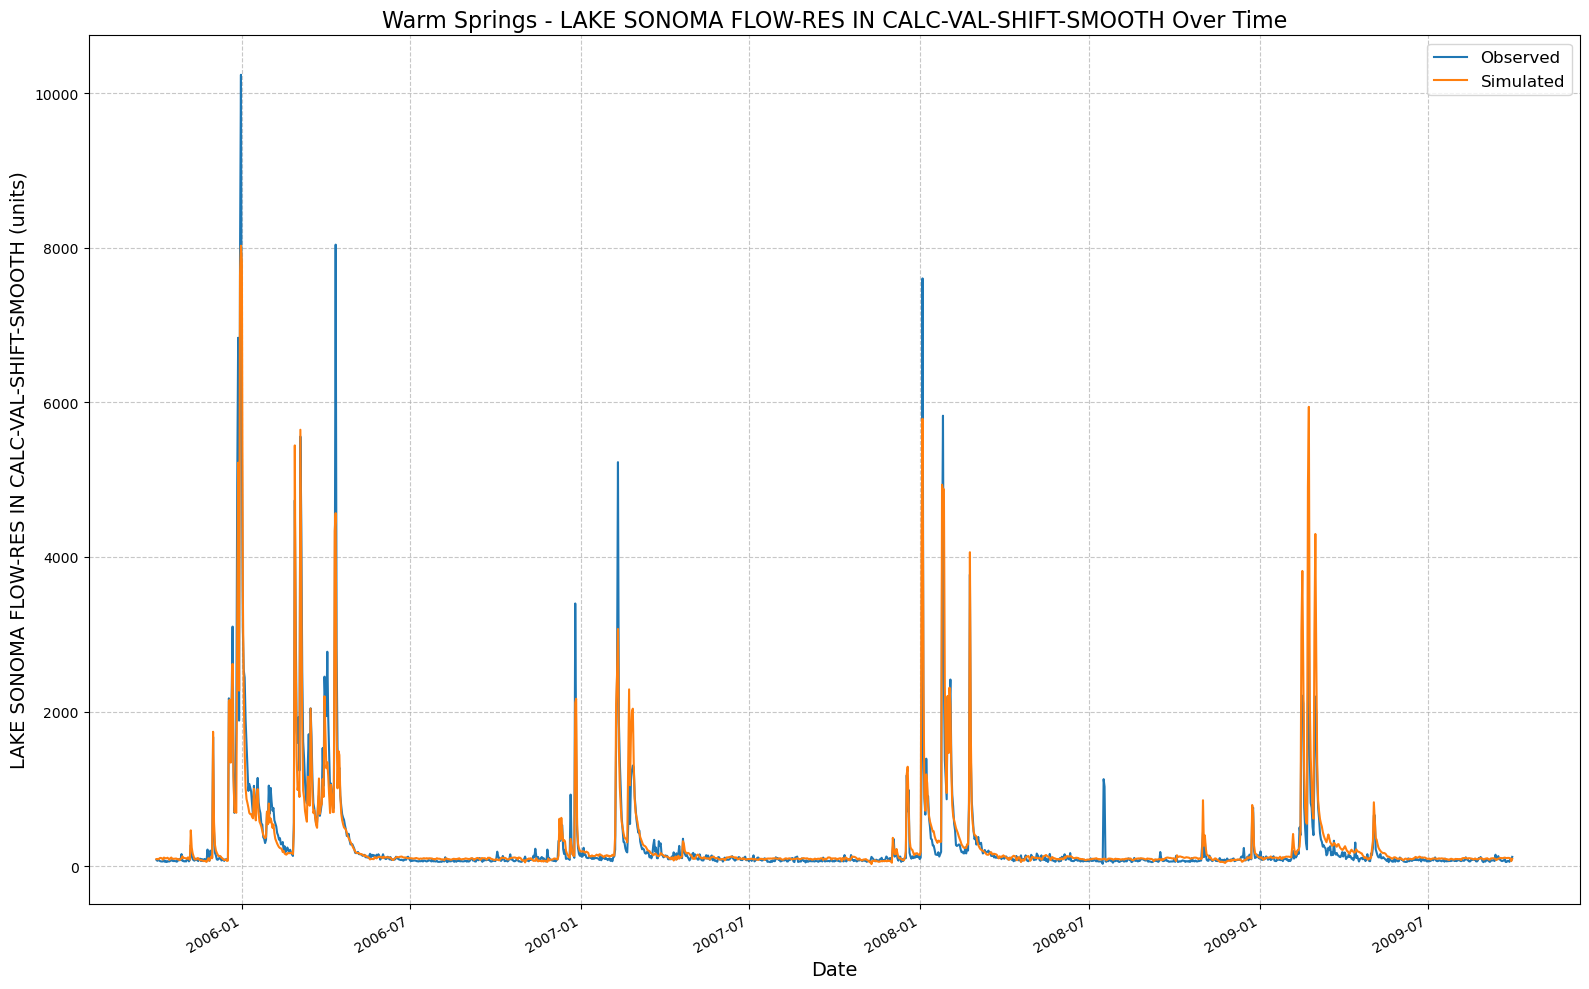

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100021\results_output.csv


{'NSE': 0.8545414507389069,
 'MSE': 77842.7890625,
 'RMSE': 279.00320618677483,
 'KGE': 0.9058456541972968,
 'Alpha-NSE': 0.9733722111010055,
 'Beta-KGE': 1.0515843629837036,
 'Beta-NSE': 0.020978676159614552,
 'Pearson-r': 0.9258713605449884,
 'FHV': 2.392459101974964,
 'FMS': -5.7894077822159735,
 'FLV': -46.591939302836096,
 'Peak-Timing': 0.16666666666666666,
 'Peak-MAPE': 52.3543914159139}

In [22]:
lstmNoPhysics.results()

Now run physics informed lstm with HMS data:

In [24]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 365,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [26]:
lstmPhysics.train()

2024-12-18 10:05:41,962: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100541\output.log initialized.
2024-12-18 10:05:41,965: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100541
2024-12-18 10:05:41,968: ### Run configurations for testing_run
2024-12-18 10:05:41,970: experiment_name: testing_run
2024-12-18 10:05:41,972: train_basin_file: warm springs
2024-12-18 10:05:41,974: validation_basin_file: warm springs
2024-12-18 10:05:41,976: test_basin_file: warm springs
2024-12-18 10:05:41,978: train_start_date: 1994-10-01 00:00:00
2024-12-18 10:05:41,979: train_end_date: 2002-09-30 00:00:00
2024-12-18 10:05:41,981: validation_start_date: 2002-10-01 00:00:00
2024-12-18 10:05:41,982: validation_end_date: 2005-09-30 00:00:00
2024-12-18 10:05:41,984: test_start_date: 2005-10-01 00:00:00
2024-12-18 10:05:41,985: test_end_date: 2009-09-30 00:00:00
2024-12-18 10:05:41,987: device: cpu
2024

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]
2024-12-18 10:09:46,332: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100541\test\model_epoch032\test_metrics.csv
2024-12-18 10:09:46,334: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100541\test\model_epoch032\test_results.p


Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

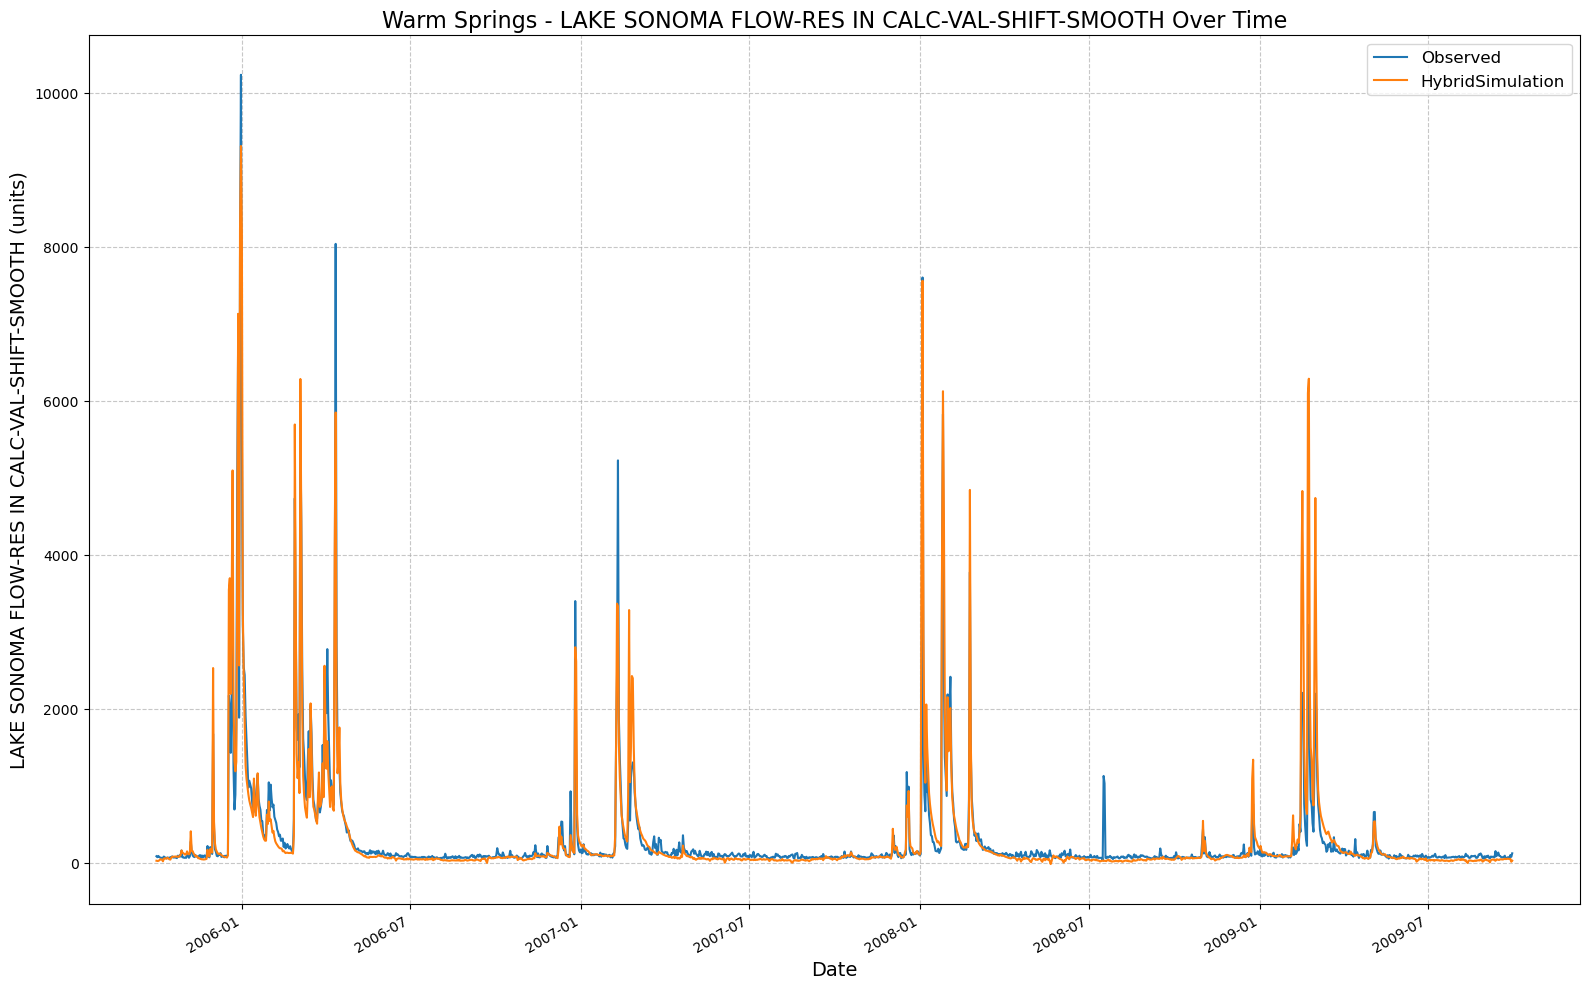

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1812_100541\results_output.csv


{'NSE': 0.8306737840175629,
 'MSE': 90615.6796875,
 'RMSE': 301.0243838752934,
 'KGE': 0.8480267152171298,
 'Alpha-NSE': 1.1352557348197616,
 'Beta-KGE': 1.019511342048645,
 'Beta-NSE': 0.007934980971747845,
 'Pearson-r': 0.9335088500812141,
 'FHV': 18.658120930194855,
 'FMS': 54.41600944667238,
 'FLV': -2122.737682762016,
 'Peak-Timing': 0.3333333333333333,
 'Peak-MAPE': 45.81706523895264}

In [28]:
lstmPhysics.results()

In [30]:
import xarray as xr

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [44]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the capella.csv thy gave us
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    # hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    print(hms_df.columns)
    #hms_df = hms_df.rename(columns={hms_df['Warm Springs Dam Inflow FLOW combined']: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["Warm Springs Dam Inflow FLOW"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "warm_springs_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2) #color="blue",
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.9) #color="lightblue",
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.9) #color="purple",
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.9) #color="orange",
    

    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

Index(['date', 'Warm Springs Dam Inflow FLOW', 'Dry Creek 20 ET-POTENTIAL',
       'Dry Creek 20 FLOW', 'Dry Creek 20 FLOW-BASE',
       'Dry Creek 20 INFILTRATION', 'Dry Creek 20 PERC-SOIL',
       'Dry Creek 20 SATURATION FRACTION', 'Dry Creek 30 ET-POTENTIAL',
       'Dry Creek 30 FLOW', 'Dry Creek 30 FLOW-BASE',
       'Dry Creek 30 INFILTRATION', 'Dry Creek 30 PERC-SOIL',
       'Dry Creek 30 SATURATION FRACTION'],
      dtype='object')


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

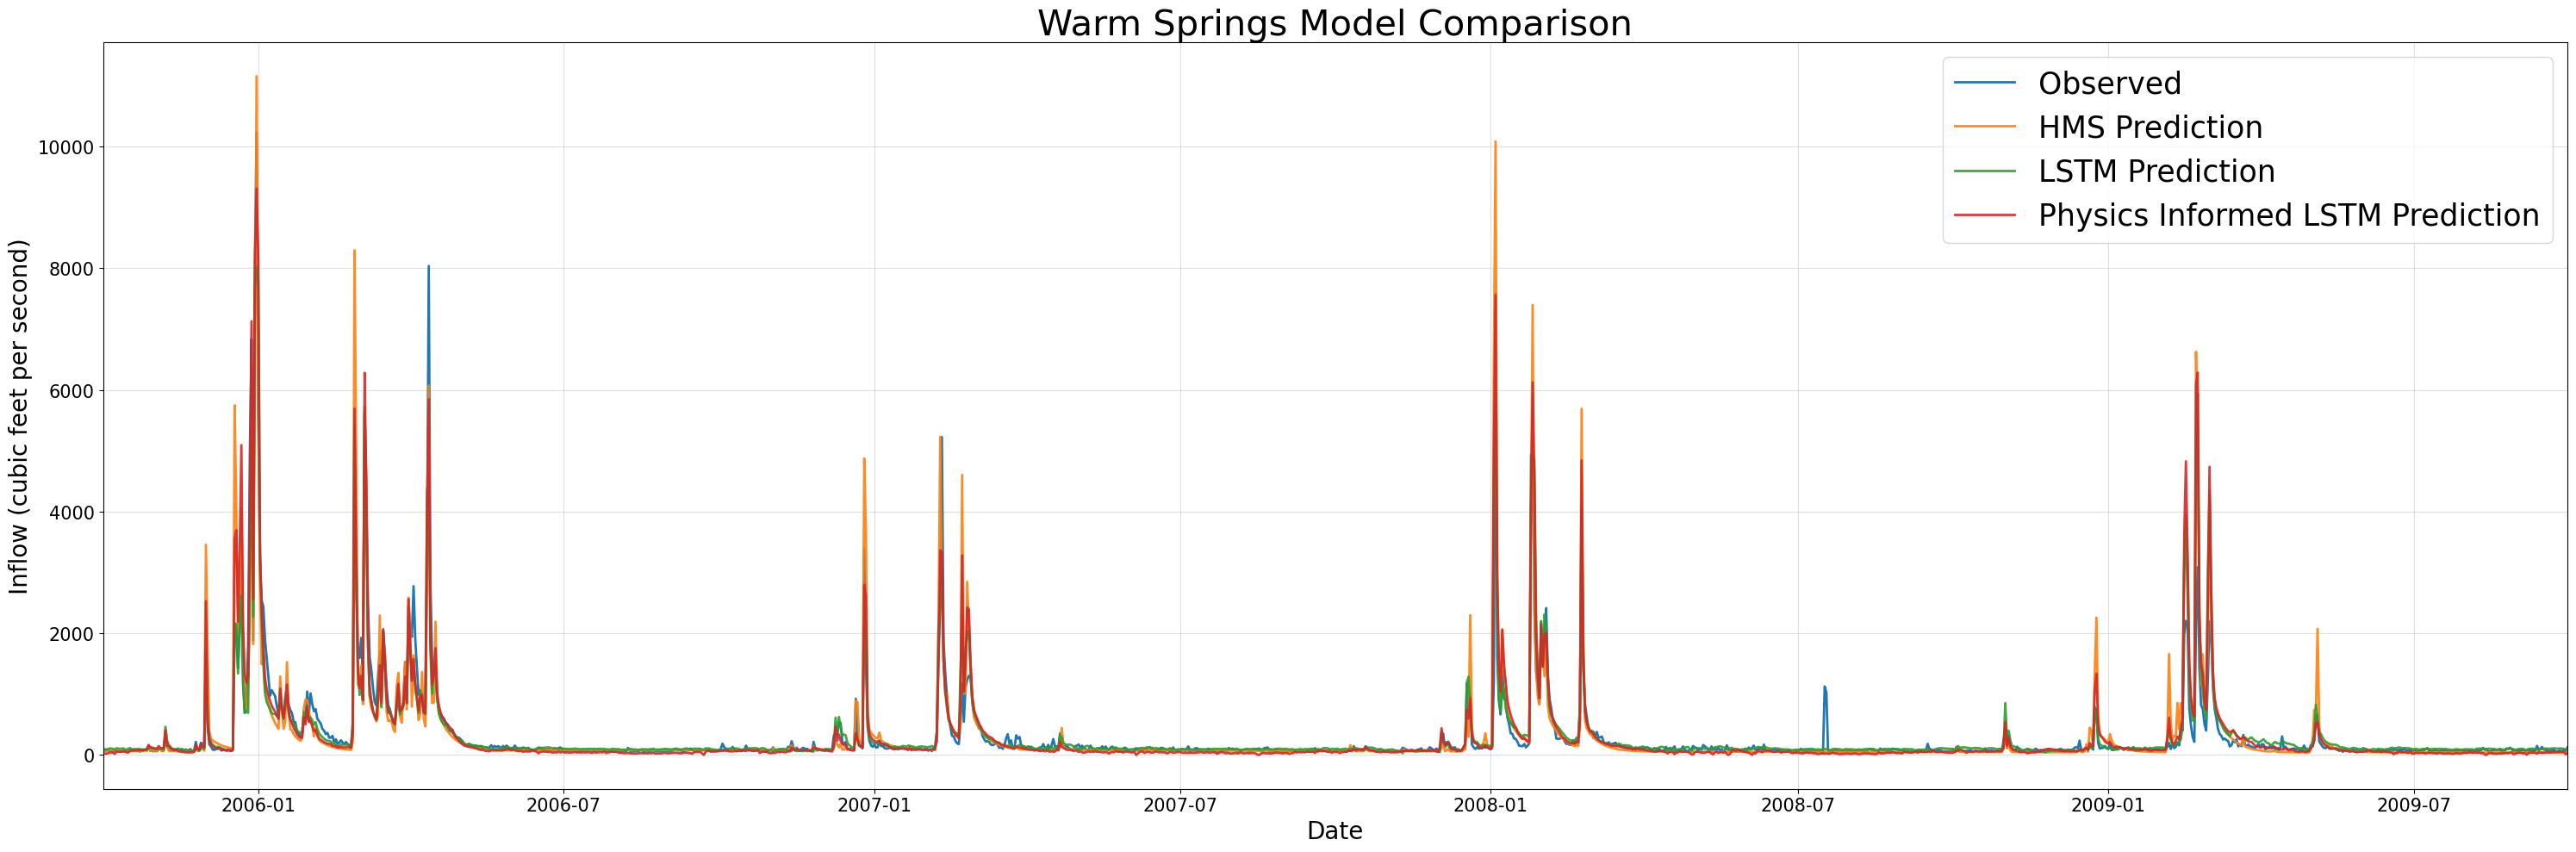

In [46]:
#change the paths to the respective ouptut csvs from running.result()
lstm_result_path = Path('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1812_100021/results_output.csv')
physics_informed_result_path = Path('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_1812_100541/results_output.csv')
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/WarmSprings_Inflow_daily.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Warm Springs Model Comparison')